# Crop Pest Classification 

- TF Model Maker library 
- easier to deploy this model for on-device ML applications.

## Prerequisites

To run this example, we first need to install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [3]:
!pip install tflite-model-maker

     |████████████████████████████████| 122kB 12.4MB/s 
     |████████████████████████████████| 849kB 8.3MB/s 
     |████████████████████████████████| 1.0MB 49.8MB/s 
     |████████████████████████████████| 344.9MB 25kB/s 
     |████████████████████████████████| 460kB 49.7MB/s 
     |████████████████████████████████| 1.1MB 48.2MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
     |████████████████████████████████| 358kB 56.2MB/s 
     |████████████████████████████████| 36.7MB 85kB/s 
     |████████████████████████████████| 174kB 58.4MB/s 
     |████████████████████████████████| 102kB 16.0MB/s 
     |████████████████████████████████| 194kB 55.5MB/s 
     |████████████████████████████████| 10.6MB 48.5MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=c185ce156f2d793b398fd816ca818c41df9da8b3a3935e789ae630417ea77e23
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
  Created wheel 

Import the required packages.

In [4]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Get the data path


In [12]:
!tar zxvf /content/drive/My\ Drive/Colab\ Notebooks/agh/base_data_images.tgz 
!ls

Streaming output truncated to the last 5000 lines.
base_data_images/Cabbage Seedpod Weevil/5364503.jpg
base_data_images/Cabbage Seedpod Weevil/1634068.jpg
base_data_images/Cabbage Seedpod Weevil/5513038.jpg
base_data_images/Cabbage Seedpod Weevil/5077019.jpg
base_data_images/Cabbage Seedpod Weevil/1577690.jpg
base_data_images/Cabbage Seedpod Weevil/5364566.jpg
base_data_images/Cabbage Seedpod Weevil/5351004.jpg
base_data_images/Cabbage Seedpod Weevil/1634007.jpg
base_data_images/Cabbage Seedpod Weevil/5372327.jpg
base_data_images/Cabbage Seedpod Weevil/5513045.jpg
base_data_images/Cabbage Seedpod Weevil/1573262.jpg
base_data_images/Cabbage Seedpod Weevil/5512887.jpg
base_data_images/Cabbage Seedpod Weevil/5419048.jpg
base_data_images/Cabbage Seedpod Weevil/5512885.jpg
base_data_images/Cabbage Seedpod Weevil/5512889.jpg
base_data_images/Cabbage Seedpod Weevil/5512803.jpg
base_data_images/Wireworms/
base_data_images/Wireworms/5541262.jpg
base_data_images/Wireworms/1577218.jpg
base_data_i

In [13]:
import pathlib

# image_path = pathlib.Path('/content/base_data_images')
image_path = pathlib.Path('base_data_images')
image_count = len(list(image_path.glob('*/*.jpg')))
print(f"Number of images {image_count}")

Number of images 15999


## Model available for image classification

EfficientNet-Lite* models, MobileNetV2, ResNet50

In [14]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 15999, num_label: 44, labels: African Armyworm, Alfalfa Looper, Angoumois grain moth, Aphids, Army worm, Aster Leafhopper, Autographia Californica Speyer, Beneficial Insects, Bertha Armyworm, Brown mite, Cabbage Seedpod Weevil, Cercospora kikuchii, Clover Cutworms, Corn (Dusky) Sap Beetle, Corn Earworm, Corn Flea Beetle, Corn Leaf Aphid, Cutworms, Diamondback moth, European Corn Borer, Fall Armyworm, Flea Beetles, Gram pod borer, Green Stink Bug, Japanese Beetles, Lygus Bugs, Painted lady, Phomopsis spp, Pink stem borer, Red turnip beetle, S. oryzae, Sclerotinia sclerotiorum, Seed-Corn Maggot, Sitophilus, Sitophilus granarius, Sitotroga cerealella, Southern Corn Rootworm, Swede midge, Termites, Wireworms, grasshoppers, green cloverworms, soybean loopers, soybean mosaic.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [15]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

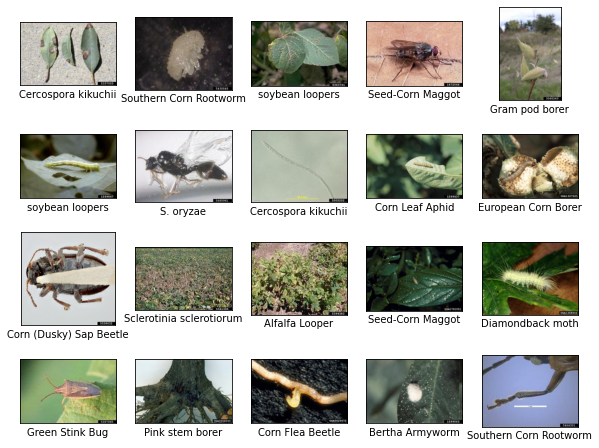

In [16]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(20)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Create a custom image classifier model based on the loaded data. 
- The default model is EfficientNet-Lite0.


In [17]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10, dropout_rate=0.1)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 44)                56364     
Total params: 3,469,388
Trainable params: 56,364
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
399/399 [==============================] - 636s 2s/step - loss: 3.5716 - accuracy: 0.1182 - val_loss: 3.0373 - val_accuracy: 0.2756
Epoch 2/10
399/399 [==============================] - 621s 2s/step - loss: 2.8868 - accuracy: 0.3086 - val_loss: 2.8779 - val_accuracy: 0.3175
Epoch 3/10
399/399 [===================

Have a look at the detailed model structure.

In [18]:
model.summary()
model.export(export_dir='.', tflite_filename='model_cpc_2_e10_d1.tflite')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 44)                56364     
Total params: 3,469,388
Trainable params: 56,364
Non-trainable params: 3,413,024
_________________________________________________________________
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmp_1e984l1/assets


INFO:tensorflow:Assets written to: /tmp/tmp_1e984l1/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpdz2qdcgj/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpdz2qdcgj/labels.txt.


In [30]:
# with open("imageLabels.txt", "w") as text_file:
#     for item in data.index_to_label:
#         text_file.write("%s\n" % item)

with open('imageLabels.txt', mode='wt', encoding='utf-8') as text_file:
    text_file.write('\n'.join(data.index_to_label))

### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [31]:
loss, accuracy = model.evaluate(test_data)

50/50 [==============================] - 77s 1s/step - loss: 2.6595 - accuracy: 0.3631


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

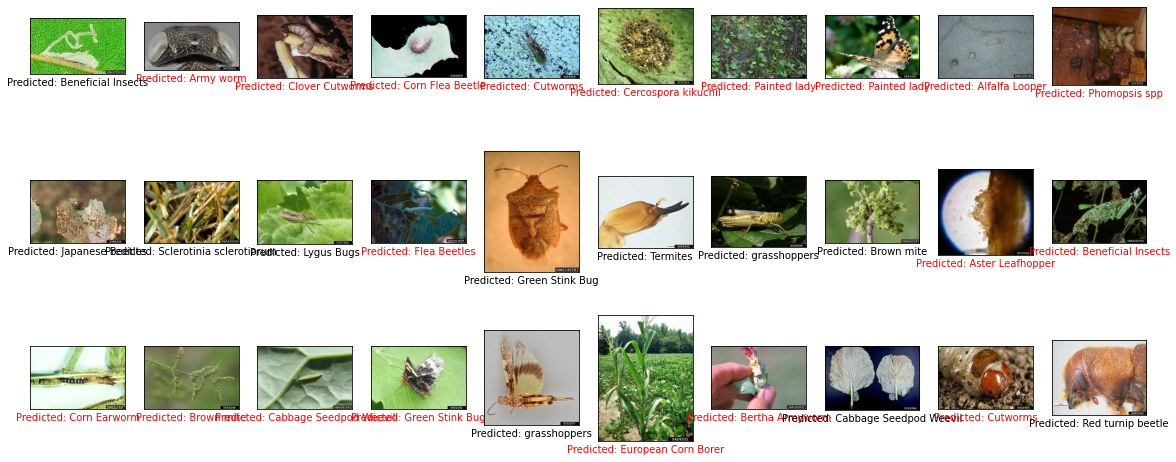

In [34]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(30)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

In [ ]:

# model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)
# model.export(export_dir='.', tflite_filename='model_cpc_1.tflite')


# Model Quantization

In [ ]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)


INFO:tensorflow:Assets written to: /tmp/tmpl78elah3/assets


INFO:tensorflow:Assets written to: /tmp/tmpl78elah3/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpdjdm2sgi/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpdjdm2sgi/labels.txt.


# Training Resnet Model

In [ ]:
# model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)
model_resnet = image_classifier.create(train_data, 
                                       model_spec=model_spec.resnet_50_spec, 
                                       validation_data=validation_data, 
                                       epochs=20,
                                        use_augmentation=True,
                                       dropout_rate=0.2)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 2048)              23564800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 44)                90156     
Total params: 23,654,956
Trainable params: 90,156
Non-trainable params: 23,564,800
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/20
399/399 [==============================] - 1692s 4s/step - loss: 3.8507 - accuracy: 0.1247 - val_loss: 3.1661 - val_accuracy: 0.2562
Epoch 2/20
399/399 [==============================] - 1574s 4s/step - loss: 3.3222 - accuracy: 0.2251 - val_loss: 3.1009 - val_accuracy: 0.2738
Epoch 3/20
399/399 [==============================] - 1570s 4s/step - loss: 3.2107 - accuracy: 0.2505 - val_loss: 3.0697 - val_accuracy: 0.2988
Epoch 4/20
399/399 [==============================] - 1590s 4s/step - loss: 3.1504 - accuracy: 0.2704 - val_loss: 3.0387 - val_accuracy: 0.3063
Epoch 5/20
399/399 [==============================] - 1561s 4s/step - loss: 3.1165 - accuracy: 0.2741 - val_loss: 3.0609 - val_accuracy: 0.3088
Epoch 6/20
399/399 [==============================] - 1537s 4s/step - loss: 3.0708 - accuracy: 0.2809 - val_loss: 3.0696 - val_accuracy: 0.3000
Epoch 7/20
399/399 [==============================] - 1534s 4s/step - loss: 3.0682 - accuracy: 0.2898 - val_loss: 3.0268 - val_accuracy:

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [ ]:
loss, accuracy = model_resnet.evaluate(test_data)

In [ ]:
model_resnet.export(export_dir='.', tflite_filename='model_resnet_cpc_3_e20_d2.tflite')

### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of `ImageModelSpec` and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [ ]:
inception_v3_spec = model_spec.ImageModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ImageModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.
